# Simple Pendulum

The equation of motion of a simple pendulum:
\begin{equation}
    \ddot{\theta} = -\frac{g}{L} \text{sin}(\theta)
\end{equation}
Using the small angles approximation $\text{sin}\theta \approx \theta$, we get 
\begin{equation}
    \ddot{\theta} = -\frac{g}{L} \theta
\end{equation} 
the ODE becomes exactly solvable
\begin{equation}
    \theta(t) = \theta_{0} cos\left(\sqrt{\frac{g}{L}}t\right) 
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
def deriv_sp(t, y, g, L):
    return np.array([y[1], -g/L * np.sin(y[0])])

In [3]:
def deriv_sa(t, y, g, L):
    '''
    Small angles approximation
    '''
    return np.array([y[1], -g/L * y[0]])

In [4]:
def rk4(t, deriv, y, dt, **kwargs):
    for i in range(len(t)-1):
        k1 = deriv(t[i], y[i][:], **kwargs) * dt
        k2 = deriv(t[i] + dt/2, y[i][:] + k1/2, **kwargs) * dt
        k3 = deriv(t[i] + dt/2, y[i][:] + k2/2,  **kwargs) * dt
        k4 = deriv( t[i], y[i][:] + k3, **kwargs) * dt
        y[i+1][:] = y[i][:] + (k1 + 2*k2 + 2*k3 + k4)/6
    #return y

In [5]:
g = 9.806
L = 1

t0 = 0
tf = 20
dt = 0.001
N = int((tf - t0)/dt)

y = np.zeros([N,2])
y2 = np.zeros([N,2])

y[0][0] = np.radians(45)
y2[0][0] = np.radians(45)
y[0][1] = 0
y2[0][1] = 0


t = np.linspace(t0, tf, N)

In [6]:
rk4(t, deriv_sp, y, dt, g=g, L=L)
rk4(t, deriv_sa, y2, dt, g=g, L=L)

In [7]:
theta = np.transpose(y)[0]
theta2 = np.transpose(y2)[0]
theta_dot = np.transpose(y)[1]
theta2_dot = np.transpose(y2)[1]

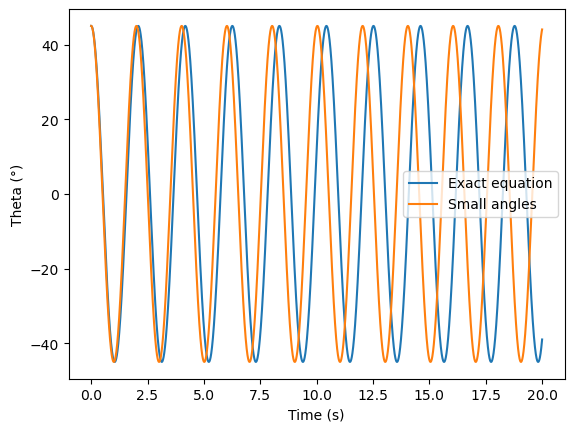

In [8]:
plt.figure()
plt.plot(t, np.degrees(theta), label = 'Exact equation')
plt.plot(t, np.degrees(theta2), label = 'Small angles')
plt.xlabel('Time (s)')
plt.ylabel('Theta (°)')
plt.legend()
#plt.savefig('45_deg.jpg')
plt.show()

![5_deg.png](./5_deg.png)

Small angle approx works with angles below 10 degrees. The pendulum behaves nearly the same as this harmonic solution.

![45_deg.gpg](./45_deg.jpg)

For large angles the approximation breaks down (here the 45 degrees case).

The period becomes longer and the motion is no longer strictly sinusoidal

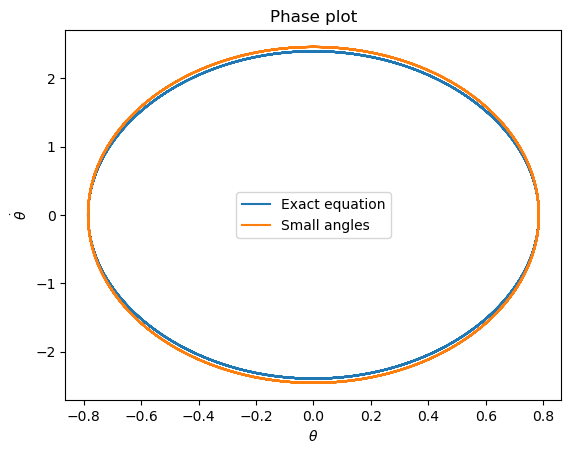

In [9]:
plt.figure()
plt.title('Phase plot')
plt.plot(theta, theta_dot, label = 'Exact equation')
plt.plot(theta2, theta2_dot, label = 'Small angles')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot{\theta}$')
#plt.xlim(0,100)
plt.legend()
#plt.savefig('phase_plot_simple_pen')
plt.show()

![pp](./phase_plot_simple_pen.png)

For small energies the phase plots are closed ellipses centered at the origin. Energy is conserved.

![pp](./phase_plot_simple_pen_open.png)

For large energies (large initial angular velocity $\omega = 10$ in the figure, the phase plots are open curves, the pendulum has enough energy to rotate completetly and it keeps spinning in one direction. This works only in the exact case since in the small angle approxiamation the equation of motion is linearized and only bounded and periodic solutions are possible.